## Homework:

Highly nonlinear oscillator: 

Recall the numerical solution for oscillations of a spring with power p = 12 (use F=-0.01\*y[0]\**11). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bn /b1 | < 0.1. Check that resuming the components reproduces the signal.
(Landau 289)

Warning: please only sample the data within one period

Landau, Rubin H., Manuel Páez, Cristian Bordeianu. Computational Physics: Problem Solving with Python, 3rd Edition. Wiley-Blackwell, 2015-07-15. VitalBook file.

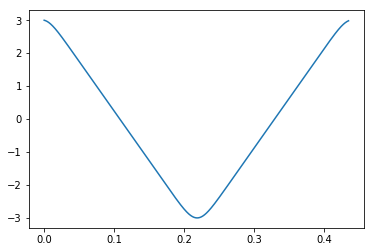

In [21]:
# Let's first try linear force  Fx=-0.01*x

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# rk4.py 4th order Runge Kutta
		 
%matplotlib inline
import matplotlib.pylab as p
import numpy as np

#   Initialization
a = 0.0
b = 0.435
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 3.;   y[1] = -5.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]                                            
    fReturn[1] = -0.01*y[0]**11      
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
       k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
p.plot(xp,yp)
p.show()

The Coefficents are determined by integrating the fourier series cos and sin with the function over the time period.I'll do a simple riemann sum and show that this gives an accurate reult.

In [22]:
T = (b-a)
dx = (b-a)/n
def an(n):
   a = yp*np.cos(2*n*np.pi*xp/T)
   return a.sum()*2*dx/(T)

def bn(n):
   b = yp*np.sin(2*n*np.pi*xp/T)
   return b.sum()*2*dx/(T)



In [23]:
def f(n):
    a = np.array([an(i)*np.cos(2*i*np.pi*xp/T) for i in range(1,n)]).sum(axis = 0)
    b = np.array([bn(i)*np.sin(2*i*np.pi*xp/T) for i in range(1,n)]).sum(axis = 0)
    a0 = yp.sum()*dx/T
    return a0 + a + b

In [24]:
h*(yp*np.cos(2*1*np.pi*xp/T)).sum()/(2*T)

0.6552218199359644

In [25]:
[an(i) for i in range(1,10)]

[2.6208872797795317,
 0.01554078240644975,
 0.26014889126797297,
 0.01411808443346166,
 0.0773904909388008,
 0.012341292698107425,
 0.03235450939482774,
 0.01068260306239449,
 0.017276298719894886]

In [26]:
[bn(i) for i in range(1,10)]

[0.04307814379582482,
 0.000313980544610331,
 0.012569164303014985,
 0.0005347640752275424,
 0.00589218071633934,
 0.000627416055672029,
 0.003050847259735633,
 0.0006188279182118208,
 0.0016820359315213977]

In [27]:
[bn(i)/bn(1) for i in range(2,20)]

[0.007288627525329035,
 0.29177590294020983,
 0.01241381424794288,
 0.1367788905730524,
 0.014564602844675933,
 0.07082123301773564,
 0.014365241017459954,
 0.039046156201475474,
 0.012967163485418251,
 0.023327582698811206,
 0.011258802531404323,
 0.015357594026144034,
 0.009676210914278973,
 0.011125397023131117,
 0.00835337202851468,
 0.008722749559971163,
 0.007290053407810471,
 0.007245716694654334]

In [28]:
[an(i)/an(1) for i in range(2,10)]

[0.005929588245304864,
 0.09925985496402448,
 0.005386757584877618,
 0.02952835535350107,
 0.004708822387487634,
 0.012344868718485823,
 0.004075949066872158,
 0.00659177479824625]

In [29]:
np.where(np.array([bn(i)/bn(1) for i in range(2,20)])>0.1)

(array([1, 3], dtype=int64),)

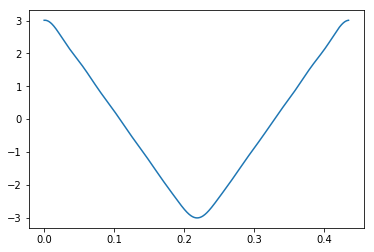

In [35]:
p.plot(xp,f(10))

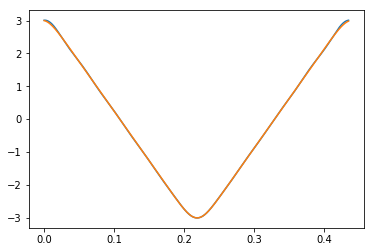

In [34]:
p.plot(xp,f(10))
p.plot(xp,yp)